** Link to dataset https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/downloads/cell-images-for-detecting-malaria.zip/1 **

** pip install tensorflow, PIL, and cv2 if not installed already **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
from tensorflow.keras import layers
import PIL
import os
import cv2

In [ ]:
image = PIL.Image #access PIL.Image module

In [4]:
infected_path = "./datasets/malaria/cell_images/parasitized/" #path to images (Will have to change to where you stored the images locally)
infected_images = os.listdir("./datasets/malaria/cell_images/parasitized/") #list all images in directory
infected_images

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144348_cell_144.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',


In [63]:
infected = [] #placeholder for resized images

for img in infected_images: #loop over all image names in folder
    try:
        pic = image.open(os.path.join(infected_path, img)) #open the image name in the correct path
        resized = pic.resize((150, 150), PIL.Image.NEAREST) #resize image to (150, 150)
        infected.append(np.asarray(resized)) #append to our placeholder list converting the image to array
    except OSError:
        print(img, " Is Not a Image") #handle error for one file that was not a image in the folder
    

Thumbs.db  Is Not a Image


In [64]:
infected = np.array(infected) # convert list to numpy array

In [65]:
infected[0].shape, infected[23].shape, infected[200].shape #inspecting shapes to confirm sizes are correct

((150, 150, 3), (150, 150, 3), (150, 150, 3))

In [11]:
infected_labels = np.ones(len(infected)) #creating our labels for the infected images (1 for True)

** Repeat same process for uninfected images **

In [12]:
uninfected_path = "./datasets/malaria/cell_images/uninfected/"
uninfected_images = os.listdir("./datasets/malaria/cell_images/uninfected/")

In [13]:
uninfected = []

for img in uninfected_images:
    try:
        pic = image.open(os.path.join(uninfected_path, img))
        resized = pic.resize((150, 150), PIL.Image.NEAREST)
        uninfected.append(np.asarray(resized))
    except OSError:
        print(img, " Not a Image")

Thumbs.db  Not a Image


In [14]:
uninfected = np.array(uninfected)

In [15]:
uninfected_labels = np.zeros(len(uninfected))

# Inspect Images

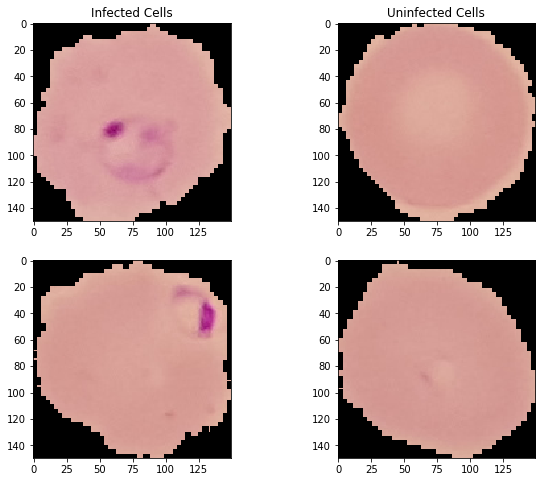

In [62]:
fig, ax = plt.subplots(2,2, figsize = (10, 8))
ax[0,0].imshow(infected[0])
ax[1,0].imshow(infected[20])
ax[1,1].imshow(uninfected[40])
ax[0,1].imshow(uninfected[330])
ax[0,0].set_title("Infected Cells");
ax[0,1].set_title("Uninfected Cells");

In [16]:
X = np.concatenate([infected, uninfected]) # Joins both infected and uninfected arrays

In [17]:
y = np.concatenate([infected_labels, uninfected_labels]) #Joins our labels

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 23) #splits the data into train and test sets. The train is used for training the model and the test set is withheld in order to test model performance

In [25]:
x_train = x_train/255 #divide by 255 in order to normalize the values of the image.
x_test = x_test/255 #  This will reduce dimensionality and allow the model to converge faster

In [26]:
y_train = y_train.astype(int) #convert labels to int
y_test = y_test.astype(int)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # keras class for image augmentation

In [28]:
augment = ImageDataGenerator(width_shift_range = 0.1, height_shift_range=0.1, horizontal_flip=True) #shifts the images both vertically and horizontally and also mirrors them. In effect generates more unique data on which the model can train

** Define Model. For further reading https://blog.goodaudience.com/convolutional-neural-net-in-tensorflow-e15e43129d7d** 

In [41]:
model = tfk.Sequential([
    layers.Conv2D(16, kernel_size = (4,4), strides = [2,2], activation = 'elu', padding = 'SAME', use_bias = False, input_shape = [150, 150, 3]),
    layers.MaxPooling2D(pool_size = [4,4], strides = [4,4]),
    layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Conv2D(32, kernel_size = (4,4), strides = [2,2], activation = 'elu', use_bias = False, padding = 'SAME'),
    layers.MaxPooling2D(pool_size = [4,4], strides = [4,4]),
    layers.BatchNormalization(),
    #layers.Dropout(0.5),
    
    layers.Flatten(),
    
    layers.Dense(512, activation = 'elu'),
    layers.Dense(256, activation = 'elu'),
    layers.Dense(2, activation = 'softmax'),
])

In [42]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [43]:
model.fit(x_train, y_train, batch_size = 16, validation_data = (x_test, y_test)  ,epochs = 10)

Train on 24802 samples, validate on 2756 samples
Epoch 1/10
24802/24802 [==============================] - 129s 5ms/step - loss: 0.2568 - acc: 0.8979 - val_loss: 0.1584 - val_acc: 0.9488
Epoch 2/10
24802/24802 [==============================] - 138s 6ms/step - loss: 0.1575 - acc: 0.9502 - val_loss: 0.1614 - val_acc: 0.9536
Epoch 3/10
24802/24802 [==============================] - 143s 6ms/step - loss: 0.1443 - acc: 0.9536 - val_loss: 0.1548 - val_acc: 0.9492
Epoch 4/10
24802/24802 [==============================] - 139s 6ms/step - loss: 0.1378 - acc: 0.9537 - val_loss: 0.1610 - val_acc: 0.9430
Epoch 5/10
24802/24802 [==============================] - 147s 6ms/step - loss: 0.1284 - acc: 0.9576 - val_loss: 0.1236 - val_acc: 0.9608
Epoch 6/10
24802/24802 [==============================] - 150s 6ms/step - loss: 0.1232 - acc: 0.9585 - val_loss: 0.1325 - val_acc: 0.9597
Epoch 7/10
24802/24802 [==============================] - 146s 6ms/step - loss: 0.1175 - acc: 0.9605 - val_loss: 0.1398 - v

**Due to memory errors I was unable to augment the images using the data generator. If you want and are able to, you would fit the model as below. This would create those shifted and flipped images on the fly and then feed them into the network for training**

In [34]:
augment.fit(x_train)

MemoryError: 

In [35]:
model.fit_generator(augment.flow(x_train, y_train, batch_size = 2), validation_data = (x_test, y_test), steps_per_epoch = len(x_train)/2 ,epochs = 10)

MemoryError: 

# Predictions

In [70]:
model.predict(x_test[0:10].reshape(-1, 150, 150, 3)) # Logits returned. First is the liklihood the image is false (uninfected) and 2nd is true (infected)

array([[6.8629143e-04, 9.9931371e-01],
       [3.1509597e-03, 9.9684900e-01],
       [5.7396900e-02, 9.4260311e-01],
       [6.0145140e-02, 9.3985486e-01],
       [6.4310499e-02, 9.3568951e-01],
       [9.9054658e-01, 9.4534922e-03],
       [5.8247184e-04, 9.9941754e-01],
       [1.6005460e-02, 9.8399460e-01],
       [3.5103977e-02, 9.6489602e-01],
       [3.2878765e-03, 9.9671209e-01]], dtype=float32)

In [71]:
preds = model.predict(x_test[0:10].reshape(-1, 150, 150, 3))

** To extract the answers we use np.argmax which finds the highest output on axis 1 **

In [72]:
np.argmax(preds, axis = 1)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [73]:
y_test[0:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

** We can confirm the model has correctly classified these 10 sample images **